In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost
%matplotlib inline

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [12]:
labelEncoder = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = labelEncoder.fit_transform(data[col])

# Splitting test train set, with 20% of the data as the validation set
train, test = train_test_split(data, test_size = 0.2) 

In [51]:
# Train set
train_y = train['class']
train_x = train[[x for x in train.columns if 'class' not in x]]
# Test/Validation set
test_y = test['class']
test_x = test[[x for x in test.columns if 'class' not in x]]

models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), XGBClassifier(), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'xgboost', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(train_x, train_y)
    print 'The accurancy of', model_names[i], 'is', accuracy_score(test_y, model.predict(test_x))

The accurancy of SVC_rbf is 1.0
The accurancy of SVC_linear is 0.976615384615
The accurancy of xgboost is 1.0
The accurancy of Logistic Regression is 0.952615384615


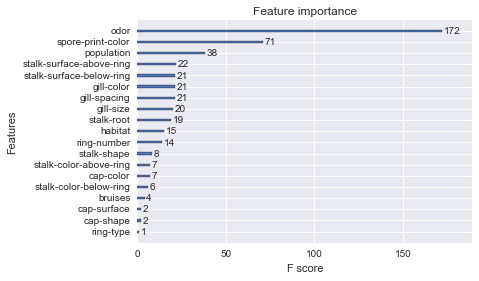

In [38]:
ax = xgboost.plot_importance(models[2])

The dataset seems really straight forward, with the problem being very much linear in nature as both Logistic regression and SVM with a linear kernel had accuracy of more than 95%. 